In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2

In [5]:
df=pd.read_csv('data/conversion_data.csv')

In [6]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

# Let is see graphs that influence for converstion:

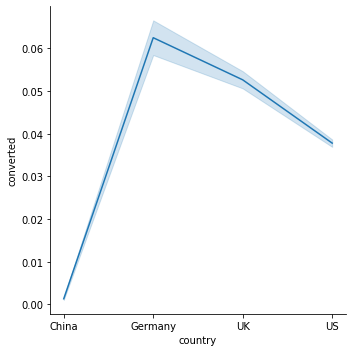

In [246]:
sns.relplot(x='country', y='converted', data= df, kind="line")

country doesn's seem influence for converstion

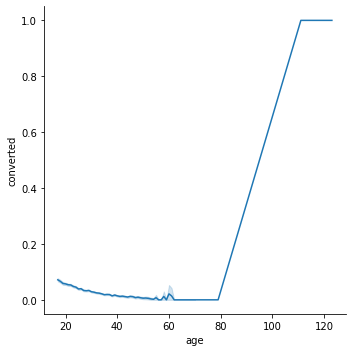

In [5]:
sns.relplot(x='age', y='converted', data= df, kind="line")

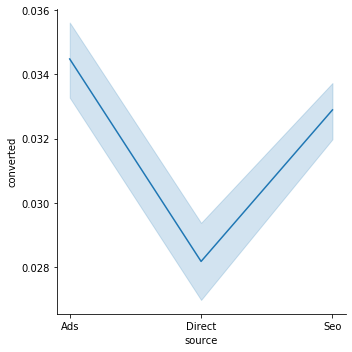

In [247]:
sns.relplot(x='source', y='converted', data= df, kind="line")

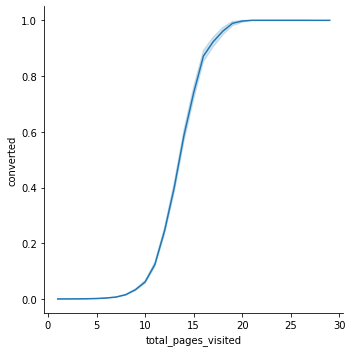

In [9]:
sns.relplot(x='total_pages_visited', y='converted', data= df, kind="line")

# Total page visit seems have an influence for converstion

In [8]:
df.shape

(316200, 6)

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [10]:
X=pd.get_dummies(X, drop_first=True)
X

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [11]:
X.columns

Index(['age', 'new_user', 'total_pages_visited', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')

In [12]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)

In [52]:
X_train

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
295243,40,1,10,0,0,1,0,1
271982,39,1,5,0,0,0,0,1
246820,20,1,2,0,0,0,0,1
144089,30,1,5,0,0,1,0,0
124446,22,1,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...
135515,37,1,6,0,0,0,1,0
287936,43,1,5,0,0,1,0,0
267215,36,0,4,0,0,1,1,0
216867,29,1,9,0,0,0,1,0


In [53]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# 1.Logistic Regression

In [54]:
#Using Logistic Regression:
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Checking the score of train data
logisticreg.score(X_train, y_train)

0.9861914927261227

In [58]:
#Checking the score of test data
logisticreg.score(X_test, y_test)

0.9862270714737508

In [59]:
#Checking the score after Cross Validation (10 times)
moyen = cross_val_score(logisticreg,X_test, y_test, cv=10).mean()
moyen

0.9862745098039216

In [60]:
#Checking the Standard Division score after Cross Validation (10 times)
std = cross_val_score(logisticreg,X_test, y_test, cv=10).std()
std

0.0009920548476507222

In [66]:
y_pred=logisticreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

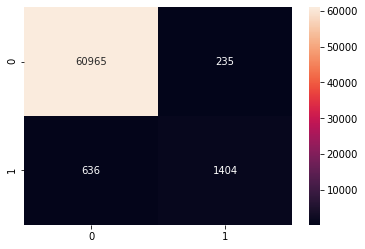

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [90]:
#Let's test with Chi2 test
dataset=sklearn.feature_selection.chi2(X, y)
dataset

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [76]:
data2 = {'Chi2 Score':dataset[0], 'P-value':dataset[1]}
df2 = pd.DataFrame(data2, index =['age', 'new_user', 'total_pages_visited', 'country_Germany','country_UK', 'country_US', 'source_Direct', 'source_Seo']) 


In [87]:
df2

,Chi2 Score,P-value
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
total_pages_visited,202697.509485,0.000000e+00
country_Germany,382.500000,3.553666e-85
country_UK,644.210526,4.057105e-142
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


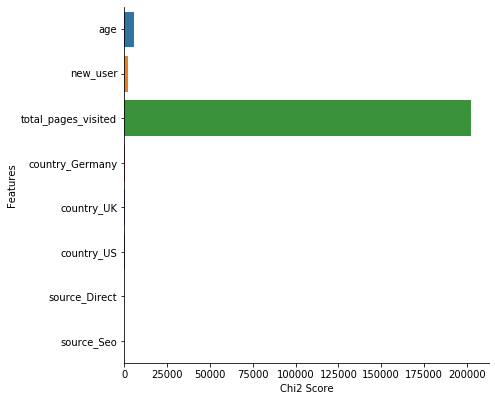

In [88]:
ax = sns.catplot(x=df2.columns[0], y=[index for index in df2.index], height=7, data=df2, kind="bar", legend=False)
ax.set(xlabel='Chi2 Score', ylabel='Features')
plt.show()

# 2. Logistic regression with Polynomial feature

I would like to test Polynomial features with Logical Regression, Lasso, Ridge.

The function to test the models:

In [137]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)

Linear regression, Lasso, Ridge models. Run the models:

In [138]:
#1.Using 3 models:
linearReg = LinearRegression(normalize=True)
linearReg.fit(X_train, y_train)

lasso = Lasso(alpha=0.2, normalize=True)
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=0.2, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

Find the R2 scores:

In [139]:
pred_train_linearReg= linearReg.predict(X_train)
# print('Linear Regression train data error score:', np.sqrt(mean_squared_error(y_train,pred_train_linearReg)))
print('Linear Regression train data R2 score:', r2_score(y_train, pred_train_linearReg))

pred_test_linearReg= linearReg.predict(X_test)
# print('Linear Regression test data error score:', np.sqrt(mean_squared_error(y_test,pred_test_linearReg))) 
print('Linear Regression test data R2 score:', r2_score(y_test, pred_test_linearReg))

Linear Regression train data R2 score: 0.3011070578191932
Linear Regression test data R2 score: 0.3021123490283367


In [140]:
pred_train_ridge= ridge.predict(X_train)
# print('Ridge train data error score:', np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print('Ridge train data R2 score:', r2_score(y_train, pred_train_ridge))

pred_test_ridge= ridge.predict(X_test)
# print('Ridge test data error score:', np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print('Ridge test data R2 score:', r2_score(y_test, pred_test_ridge))

Ridge train data R2 score: 0.2931420083808207
Ridge test data R2 score: 0.2936645273175198


In [141]:
pred_train_lasso= lasso.predict(X_train)
# print('Lasso train data error score:', np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('Lasso train data error score:', r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
# print('Lasso test data error score:', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('Lasso test data error score:', r2_score(y_test, pred_test_lasso))

Lasso train data error score: 0.0
Lasso test data error score: 0.0


# 2.1 With GridSearch

In [142]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [143]:
#1.Using 3 models:

ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

#LinearRegression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

#Ridge
ridge = Ridge()
grid_ridge = GridSearchCV(ridge,param_grid=ridge_params, cv = 5).fit(X_train,y_train)

#Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(lasso,param_grid=lasso_params, cv = 5).fit(X_train,y_train)

In [144]:
pred_train_linearReg= linearReg.predict(X_train)
print('Linear Regression train data R2 score:', r2_score(y_train, pred_train_linearReg))

pred_test_linearReg= linearReg.predict(X_test)
print('Linear Regression test data R2 score:', r2_score(y_test, pred_test_linearReg))

Linear Regression train data R2 score: 0.3008493699891207
Linear Regression test data R2 score: 0.3031264629765271


In [149]:
print('Ridge best parameter:', grid_ridge.best_params_)
print()
print('Ridge train R2 score:', grid_ridge.best_estimator_.score(X_train, y_train))
pred_test_ridge= grid_ridge.predict(X_test)
print('Ridge test data R2 score:', grid_ridge.best_estimator_.score(X_test, y_test))

Ridge best parameter: {'alpha': 200}

Ridge train R2 score: 0.300849189570933
Ridge test data R2 score: 0.3031256858580652


In [150]:
print('Lasso best parameter:', grid_lasso.best_params_)
print()
print('Lasso train R2 score:', grid_lasso.best_estimator_.score(X_train, y_train))
pred_test_ridge= grid_lasso.predict(X_test)
print('Lasso test data R2 score:', grid_lasso.best_estimator_.score(X_test, y_test))

Lasso best parameter: {'alpha': 0.02}

Lasso train R2 score: 0.2674997889001821
Lasso test data R2 score: 0.2702500839426841


# 2.2 With Polynomial features

In [165]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)


In [166]:
pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', Ridge())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', Lasso())])

#Using 3 models:
ridge_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
lasso_params = {'fit__alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

#LinearRegression
linearReg = LinearRegression()
linear_reg=linearReg.fit(X_train, y_train)
linear_reg_scores = cross_val_score(pipe1, X, y, cv=5, n_jobs=-1)

#Ridge
ridge = Ridge()
grid_ridge = GridSearchCV(pipe2, param_grid=ridge_params, cv = 5, n_jobs=-1).fit(X_train,y_train)

#Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(pipe3, param_grid=lasso_params, cv = 5, n_jobs=-1).fit(X_train,y_train)

In [167]:
pred_train_linearReg= linearReg.predict(X_train)
print('Linear Regression train data R2 score:', r2_score(y_train, pred_train_linearReg))

pred_test_linearReg= linearReg.predict(X_test)
print('Linear Regression test data R2 score:', r2_score(y_test, pred_test_linearReg))

Linear Regression train data R2 score: 0.3013942342511512
Linear Regression test data R2 score: 0.30095436536714726


In [168]:
print('Ridge best parameter:', grid_ridge.best_params_)
print()
print('Ridge train R2 score:', grid_ridge.best_estimator_.score(X_train, y_train))
pred_test_ridge= grid_ridge.predict(X_test)
print('Ridge test data R2 score:', grid_ridge.best_estimator_.score(X_test, y_test))

Ridge best parameter: {'fit__alpha': 0.06}

Ridge train R2 score: 0.5626899628730819
Ridge test data R2 score: 0.5553135698594116


In [169]:
print('Lasso best parameter:', grid_lasso.best_params_)
print()
print('Lasso train R2 score:', grid_lasso.best_estimator_.score(X_train, y_train))
pred_test_ridge= grid_lasso.predict(X_test)
print('Lasso test data R2 score:', grid_lasso.best_estimator_.score(X_test, y_test))

Lasso best parameter: {'fit__alpha': 0.02}

Lasso train R2 score: 0.5426581231302842
Lasso test data R2 score: 0.5355533714131683


In [178]:
results = {'Normalize': [0.3021123490283367,0.2936645273175198, 0.0],
           'GridSearch': [0.3031264629765271,0.3031256858580652,0.2702500839426841],
           'Polynomial': [0.30095436536714726,0.5553135698594116,0.5355533714131683]
          }

df_result = pd.DataFrame(results, columns = ['Normalize','GridSearch', 'Polynomial'], index=['Linear','Ridge','Lasso'])
print (df_result)

        Normalize  GridSearch  Polynomial
Linear   0.302112    0.303126    0.300954
Ridge    0.293665    0.303126    0.555314
Lasso    0.000000    0.270250    0.535553


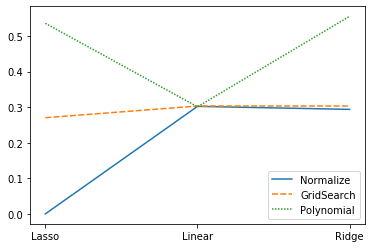

In [177]:
sns.lineplot(data=df_result, hue='Normalize')

# 3.Decision Tree Model

In [203]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [197]:
rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1, 10),
          'min_samples_split' : [2, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid=params, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
   

In [198]:
grid.best_params_

{'max_depth': 8, 'min_samples_split': 20}

In [200]:
grid.best_estimator_.score(X_test, y_test)

0.9857052498418722

In [201]:
grid.best_estimator_.score(X_train, y_train)

0.9861886690159934

In [202]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91800
           1       0.86      0.67      0.75      3060

    accuracy                           0.99     94860
   macro avg       0.92      0.83      0.87     94860
weighted avg       0.98      0.99      0.98     94860



# 4. Random Forest Model

In [206]:
#Let's split data into train and test with 80%, 20% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2)

In [207]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [210]:
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(10, 17, 1),
          "max_depth" : range(1,5),
          "max_features" : range(1,5)
          }

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  4.1min finished


In [211]:
classifier.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 13}

In [230]:
classifier.best_estimator_.score(X_test, y_test)

0.9847248576850095

In [232]:
print(classification_report(y_true=y_test, y_pred=classifier.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.86      0.63      0.73      2040

    accuracy                           0.98     63240
   macro avg       0.92      0.81      0.86     63240
weighted avg       0.98      0.98      0.98     63240



In [238]:
#Finding most important feature in RandomForest: 
feature_importances = pd.DataFrame([X.columns,classifier.best_estimator_.feature_importances_]).T
feature_importances = feature_importances.rename(columns={0: 'features', 1: 'score_RF'}).sort_values(by='score_RF', ascending=False)
feature_importances

,features,score_RF
2,total_pages_visited,0.923669
1,new_user,0.0519085
0,age,0.0174354
4,country_UK,0.00373753
3,country_Germany,0.00275225
5,country_US,0.000327523
6,source_Direct,0.00016838
7,source_Seo,9.1634e-07


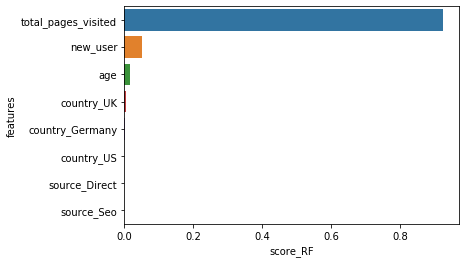

In [239]:
sns.barplot(x='score_RF', y='features', data=feature_importances)

(221340, 8) (94860, 8)
The optimal number of features is 1
The selected features are:
['total_pages_visited']
(221340, 1) (94860, 1)
Roc AUC:dtc 0.9744582470409824
Roc AUC:rfc 0.9764523843708972
Roc AUC:xgb 0.9764626204534012


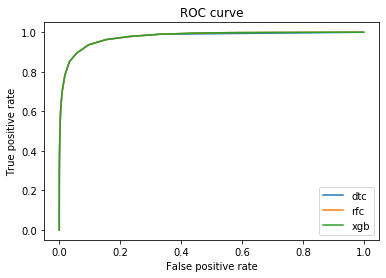

In [245]:
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel


#split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, X_test.shape)

#Feature selection

# sclf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
sclf = GradientBoostingClassifier(n_estimators=200)
selector = sclf.fit(X_train, y_train)
fs = SelectFromModel(selector, prefit=True)

X_train = fs.transform(X_train)
X_test = fs.transform(X_test)
# test = fs.transform(test)

print('The optimal number of features is {}'.format(X_train.shape[1]))
features = [f for f,s in zip(X.columns, fs.get_support()) if s]
print('The selected features are:')
print ('{}'.format(features))

print(X_train.shape, X_test.shape)

#loop
names = [
#         "etsc",
         "dtc",
         "rfc",
#          "abc",
         "xgb"
#          "gbc"
        ]
clfs = [
# ExtraTreesClassifier(n_estimators=3000, max_depth=5, class_weight='balanced'),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(n_estimators=1000, max_depth=5, class_weight='balanced'),
# AdaBoostClassifier(n_estimators=200),
xgb.XGBClassifier(n_estimators=200, nthread=-1, max_depth = 5),
# GradientBoostingClassifier(n_estimators=200,max_depth=5)
]

plt.figure()
for name,clf in zip(names,clfs):

    clf.fit(X_train,y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    print("Roc AUC:"+name, roc_auc_score(y_test, clf.predict_proba(X_test)[:,1],average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show()          

#probs = xgb.predict_proba(test)
#submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
#submission.to_csv("submission.csv", index=False)
